In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load dataset
def load_data(filepath='/content/Social_Network_Ads.csv'):
    import pandas as pd
    from sklearn.preprocessing import LabelEncoder
    df = pd.read_csv(filepath)
    df.drop(columns=["User ID"], inplace=True)  # Drop unnecessary column
    df["Gender"] = LabelEncoder().fit_transform(df["Gender"])  # Encode categorical features
    return df

    df.drop(columns=["User ID"], inplace=True)  # Drop unnecessary column
    df["Gender"] = LabelEncoder().fit_transform(df["Gender"])  # Encode categorical features
    return df

In [6]:
load_data()

,Gender,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0
1,1,35.0,20000.0,0
2,0,26.0,43000.0,0
3,0,27.0,57000.0,0
4,1,19.0,76000.0,0
...,...,...,...,...
395,0,46.0,41000.0,1
396,1,51.0,23000.0,1
397,0,50.0,20000.0,1
398,1,36.0,33000.0,0


In [7]:
# Feature Engineering - Adding 50 New Features

def add_new_features(df):
    df["Age_Squared"] = df["Age"] ** 2
    df["Salary_Squared"] = df["EstimatedSalary"] ** 2
    df["Age_Salary_Ratio"] = df["Age"] / (df["EstimatedSalary"] + 1)
    df["Age_Log"] = np.log(df["Age"] + 1)
    df["Salary_Log"] = np.log(df["EstimatedSalary"] + 1)
    df["Age_Salary_Product"] = df["Age"] * df["EstimatedSalary"]
    df["Age_Cube"] = df["Age"] ** 3
    df["Salary_Cube"] = df["EstimatedSalary"] ** 3
    df["Age_Exp"] = np.exp(df["Age"])
    df["Salary_Exp"] = np.exp(df["EstimatedSalary"])
    df["Age_Sqrt"] = np.sqrt(df["Age"])
    df["Salary_Sqrt"] = np.sqrt(df["EstimatedSalary"])
    df["Age_Binned"] = pd.cut(df["Age"], bins=5, labels=False)
    df["Salary_Binned"] = pd.cut(df["EstimatedSalary"], bins=5, labels=False)
    df["Age_Gender_Interaction"] = df["Age"] * df["Gender"]
    df["Salary_Gender_Interaction"] = df["EstimatedSalary"] * df["Gender"]
    df["Age_Diff"] = df["Age"].diff().fillna(0)
    df["Salary_Diff"] = df["EstimatedSalary"].diff().fillna(0)
    df["Age_Salary_Sum"] = df["Age"] + df["EstimatedSalary"]
    df["Age_Salary_Diff"] = df["Age"] - df["EstimatedSalary"]
    df["Age_Salary_Mean"] = (df["Age"] + df["EstimatedSalary"]) / 2
    df["Age_Salary_Std"] = df[["Age", "EstimatedSalary"]].std(axis=1)
    df["Age_Salary_Min"] = df[["Age", "EstimatedSalary"]].min(axis=1)
    df["Age_Salary_Max"] = df[["Age", "EstimatedSalary"]].max(axis=1)
    return df

In [8]:
add_new_features(load_data())

,Gender,Age,EstimatedSalary,Purchased,Age_Squared,Salary_Squared,Age_Salary_Ratio,Age_Log,Salary_Log,Age_Salary_Product,...,Age_Gender_Interaction,Salary_Gender_Interaction,Age_Diff,Salary_Diff,Age_Salary_Sum,Age_Salary_Diff,Age_Salary_Mean,Age_Salary_Std,Age_Salary_Min,Age_Salary_Max
0,1,19.0,19000.0,0,361.0,3.610000e+08,0.001000,2.995732,9.852247,361000.0,...,19.0,19000.0,0.0,0.0,19019.0,-18981.0,9509.5,13421.593814,19.0,19000.0
1,1,35.0,20000.0,0,1225.0,4.000000e+08,0.001750,3.583519,9.903538,700000.0,...,35.0,20000.0,16.0,1000.0,20035.0,-19965.0,10017.5,14117.386886,35.0,20000.0
2,0,26.0,43000.0,0,676.0,1.849000e+09,0.000605,3.295837,10.668979,1118000.0,...,0.0,0.0,-9.0,23000.0,43026.0,-42974.0,21513.0,30387.206815,26.0,43000.0
3,0,27.0,57000.0,0,729.0,3.249000e+09,0.000474,3.332205,10.950824,1539000.0,...,0.0,0.0,1.0,14000.0,57027.0,-56973.0,28513.5,40285.994645,27.0,57000.0
4,1,19.0,76000.0,0,361.0,5.776000e+09,0.000250,2.995732,11.238502,1444000.0,...,19.0,76000.0,-8.0,19000.0,76019.0,-75981.0,38009.5,53726.680341,19.0,76000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,46.0,41000.0,1,2116.0,1.681000e+09,0.001122,3.850148,10.621352,1886000.0,...,0.0,0.0,7.0,-18000.0,41046.0,-40954.0,20523.0,28958.851117,46.0,41000.0
396,1,51.0,23000.0,1,2601.0,5.290000e+08,0.002217,3.951244,10.043293,1173000.0,...,51.0,23000.0,5.0,-18000.0,23051.0,-22949.0,11525.5,16227.393521,51.0,23000.0
397,0,50.0,20000.0,1,2500.0,4.000000e+08,0.002500,3.931826,9.903538,1000000.0,...,0.0,0.0,-1.0,-3000.0,20050.0,-19950.0,10025.0,14106.780285,50.0,20000.0
398,1,36.0,33000.0,0,1296.0,1.089000e+09,0.001091,3.610918,10.404293,1188000.0,...,36.0,33000.0,-14.0,13000.0,33036.0,-32964.0,16518.0,23309.067935,36.0,33000.0


In [13]:
# Data Preprocessing
def preprocess_data(df):
    #df = add_new_features(df) #REMOVE THIS LINE
    X = df.drop(columns=["Purchased"])
    y = df["Purchased"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

In [16]:
# Model Training and Evaluation
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "SVM": SVC(probability=True),
        "KNN": KNeighborsClassifier()
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        print(f"{name} Accuracy: {acc:.4f}")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("-" * 50)
    return models, results

In [17]:
models, results = train_evaluate_models(*preprocess_data(load_data()))

Logistic Regression Accuracy: 0.8000
Confusion Matrix:
 [[47  4]
 [12 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85        51
           1       0.81      0.59      0.68        29

    accuracy                           0.80        80
   macro avg       0.80      0.75      0.77        80
weighted avg       0.80      0.80      0.79        80

--------------------------------------------------
Decision Tree Accuracy: 0.8500
Confusion Matrix:
 [[43  8]
 [ 4 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88        51
           1       0.76      0.86      0.81        29

    accuracy                           0.85        80
   macro avg       0.84      0.85      0.84        80
weighted avg       0.86      0.85      0.85        80

--------------------------------------------------
Random Forest Accuracy: 0.9000
Confusion Matrix:
 [[

In [23]:
# Hyperparameter Tuning
def hyperparameter_tuning(X_train, y_train):
    param_grid = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
    gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="accuracy")
    gs.fit(X_train, y_train)
    print("Best Random Forest Parameters:", gs.best_params_)
    return gs.best_estimator_

NameError: name 'gs' is not defined

In [24]:
# Plot ROC Curve
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


In [26]:
# Plot ROC Curve
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f}")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


Logistic Regression Accuracy: 0.8000
Confusion Matrix:
 [[47  4]
 [12 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85        51
           1       0.81      0.59      0.68        29

    accuracy                           0.80        80
   macro avg       0.80      0.75      0.77        80
weighted avg       0.80      0.80      0.79        80

--------------------------------------------------
Decision Tree Accuracy: 0.8500
Confusion Matrix:
 [[43  8]
 [ 4 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88        51
           1       0.76      0.86      0.81        29

    accuracy                           0.85        80
   macro avg       0.84      0.85      0.84        80
weighted avg       0.86      0.85      0.85        80

--------------------------------------------------
Random Forest Accuracy: 0.9000
Confusion Matrix:
 [[

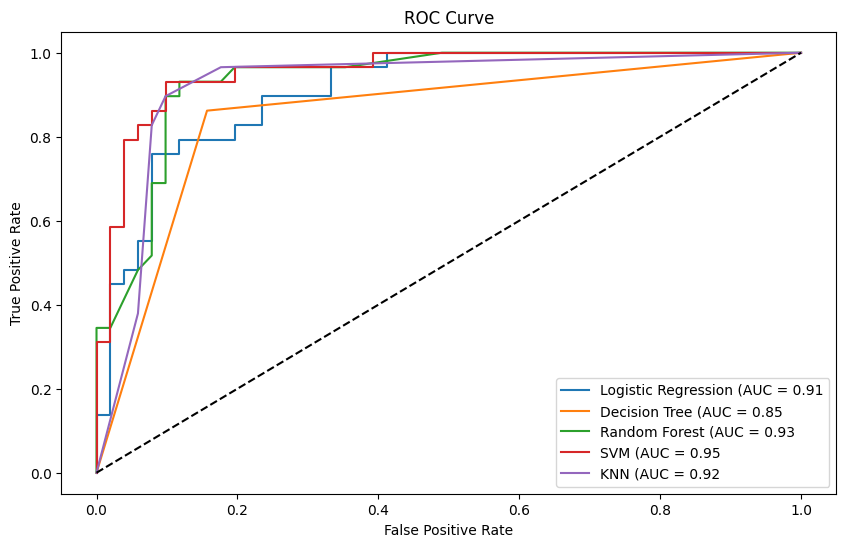

In [28]:
# Main Execution
if __name__ == "__main__":
    df = load_data("Social_Network_Ads.csv")
    X_train, X_test, y_train, y_test = preprocess_data(df)
    models, results = train_evaluate_models(X_train, X_test, y_train, y_test)
    best_model = hyperparameter_tuning(X_train, y_train)
    plot_roc_curve(models, X_test, y_test)